# Import all basic libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import ElasticNet, LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import pickle
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

# Loading the Data

In [16]:
df = pd.read_csv(r'C:\Users\wesam\OneDrive\سطح المكتب\Task 10\train (1).csv')

# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:

    Data Visuals
    Data Understanding
    Data Analysis

In [17]:
df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [18]:
df.shape

(14396, 18)

## features

* artist: Name of the Artist.
* song: Name of the Track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* duration in milliseconds :Time of the song

* time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

* Class: Genre of the track.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

## check if any null values in data and any duplicated data

In [21]:
df.duplicated().any()

False

In [22]:
print(df.isnull().sum())

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [23]:
info_df = pd.DataFrame(df.dtypes)

# identifying the missing values from the dataset.
info_df['missing_val'] = df.isnull().sum()

info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)


# renaming the first column using rename()
info_df = info_df.rename(columns = {0:'data_type'})
info_df

,data_type,missing_val,missing_val_ratio
Id,int64,0,0
Artist Name,object,0,0
Track Name,object,0,0
Popularity,float64,333,2
danceability,float64,0,0
energy,float64,0,0
key,float64,1609,11
loudness,float64,0,0
mode,int64,0,0
speechiness,float64,0,0


In [24]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [25]:
df.describe(include=['O'])

,Artist Name,Track Name
count,14396,14396
unique,7913,12455
top,Backstreet Boys,Fire
freq,58,8


In [26]:
df.var()

Id                    1.727160e+07
Popularity            3.034195e+02
danceability          2.739588e-02
energy                5.568065e-02
key                   1.024008e+01
loudness              1.646219e+01
mode                  2.303467e-01
speechiness           7.251645e-03
acousticness          9.667246e-02
instrumentalness      9.257760e-02
liveness              2.536303e-02
valence               5.734884e-02
tempo                 8.725224e+02
duration_in min/ms    1.247445e+10
time_signature        1.292547e-01
Class                 1.027953e+01
dtype: float64

In [27]:
df.cov()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.727160e+07,653.435589,7.529887,-9.879614,76.077183,-126.704060,-20.795172,-1.831394,-8.823153,6.051463,-5.389850,-2.034170,-520.433799,7.408836e+06,-1.368496,36.015804
Popularity,6.534356e+02,303.419486,0.499692,0.212303,0.567471,8.754268,0.115032,0.043449,-0.695823,-0.836400,-0.189741,0.228211,-1.524755,-5.361306e+04,0.440062,8.857358
danceability,7.529887e+00,0.499692,0.027396,-0.003703,0.004061,0.037737,-0.005506,0.002861,0.000382,-0.010232,-0.002793,0.017631,-0.883776,-2.352313e+03,0.008160,-0.053679
energy,-9.879614e+00,0.212303,-0.003703,0.055681,0.009652,0.736806,-0.004074,0.002429,-0.054764,-0.014021,0.007433,0.012858,1.431812,6.356550e+03,0.012129,0.163121
key,7.607718e+01,0.567471,0.004061,0.009652,10.240082,0.074043,-0.175861,0.000313,-0.007620,-0.001211,0.007426,0.024128,1.884343,5.105833e+03,0.009230,-0.042714
loudness,-1.267041e+02,8.754268,0.037737,0.736806,0.074043,16.462188,-0.059496,0.031259,-0.775795,-0.460863,0.073445,0.180511,19.385516,7.658591e+04,0.183764,2.264941
mode,-2.079517e+01,0.115032,-0.005506,-0.004074,-0.175861,-0.059496,0.230347,-0.002963,0.003106,-0.002864,-0.000206,-0.000871,0.249736,-3.797831e+03,-0.002902,-0.061693
speechiness,-1.831394e+00,0.043449,0.002861,0.002429,0.000313,0.031259,-0.002963,0.007252,-0.002247,-0.001342,0.000984,0.001208,0.125114,5.947466e+01,0.001714,-0.017142
acousticness,-8.823153e+00,-0.695823,0.000382,-0.054764,-0.007620,-0.775795,0.003106,-0.002247,0.096672,0.017845,-0.005417,-0.009509,-1.496912,-1.115964e+04,-0.015594,-0.239855
instrumentalness,6.051463e+00,-0.836400,-0.010232,-0.014021,-0.001211,-0.460863,-0.002864,-0.001342,0.017845,0.092578,-0.002409,-0.017009,-0.324463,-3.545041e+02,-0.007889,-0.028487


In [28]:
df.nunique()

Id                    14396
Artist Name            7913
Track Name            12455
Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       3945
liveness               1407
valence                1268
tempo                 11392
duration_in min/ms    11805
time_signature            4
Class                    11
dtype: int64

In [29]:
len(df["Id"].unique()) 

14396

In [30]:
len(df["Artist Name"].unique())

7913

In [31]:
len(df["Track Name"].unique())

12455

In [32]:
df["Artist Name"].unique()

array(['Marina Maximilian', 'The Black Keys', 'Royal & the Serpent', ...,
       'Cold Years', 'The Jaded Hearts Club', 'Freddy Fender'],
      dtype=object)

In [33]:
df["Track Name"].unique()

array(['Not Afraid', "Howlin' for You", 'phuck u', ..., 'Too Far Gone',
       "Reach Out I'll Be There", 'Before the Next Teardrop Falls'],
      dtype=object)

In [34]:
df["mode"].unique()

array([0, 1], dtype=int64)

In [35]:
# df["key"] = df["key"].astype(int)

In [36]:
df["key"].unique()

array([ 9., 11.,  7., nan,  6.,  1.,  5., 10.,  4.,  2.,  3.,  8.])

In [37]:
df["Class"].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7], dtype=int64)

In [38]:
df['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

# Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

In [39]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = df, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

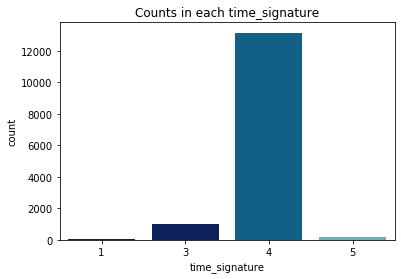

In [40]:
plot_counts("time_signature")

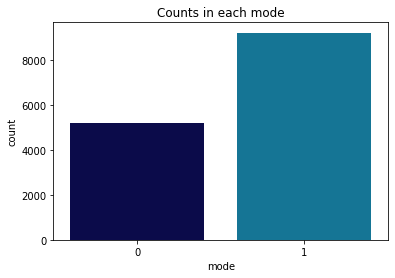

In [41]:
plot_counts("mode")

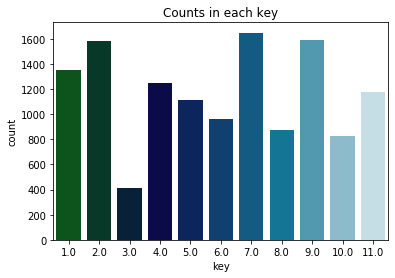

In [42]:
plot_counts("key")

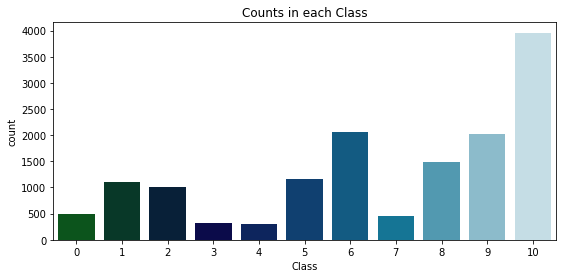

In [43]:
plt.figure(figsize = (9, 4))
plot_counts("Class")

In [44]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [45]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [46]:
numeric_features = df.drop(columns=["Artist Name","Track Name"], axis = 1)

In [47]:
numeric_features

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


# Visualization every feature

Histogram  && Density chart for numeric column

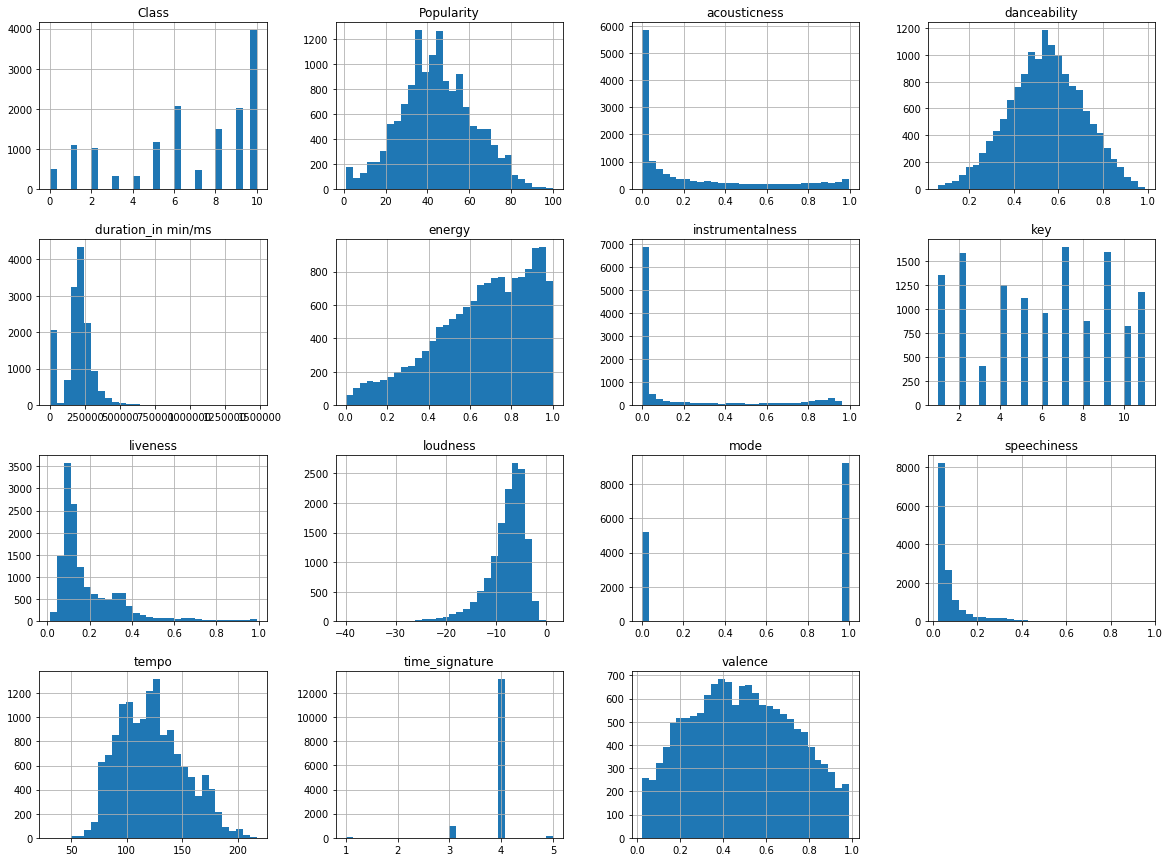

In [48]:
numeric_features.hist(bins=30, figsize=(20,15))
plt.show()

In [49]:
numeric_features.var()

Popularity            3.034195e+02
danceability          2.739588e-02
energy                5.568065e-02
key                   1.024008e+01
loudness              1.646219e+01
mode                  2.303467e-01
speechiness           7.251645e-03
acousticness          9.667246e-02
instrumentalness      9.257760e-02
liveness              2.536303e-02
valence               5.734884e-02
tempo                 8.725224e+02
duration_in min/ms    1.247445e+10
time_signature        1.292547e-01
Class                 1.027953e+01
dtype: float64

In [50]:
numeric_features.cov()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,303.419486,0.499692,0.212303,0.567471,8.754268,0.115032,0.043449,-0.695823,-0.836400,-0.189741,0.228211,-1.524755,-5.361306e+04,0.440062,8.857358
danceability,0.499692,0.027396,-0.003703,0.004061,0.037737,-0.005506,0.002861,0.000382,-0.010232,-0.002793,0.017631,-0.883776,-2.352313e+03,0.008160,-0.053679
energy,0.212303,-0.003703,0.055681,0.009652,0.736806,-0.004074,0.002429,-0.054764,-0.014021,0.007433,0.012858,1.431812,6.356550e+03,0.012129,0.163121
key,0.567471,0.004061,0.009652,10.240082,0.074043,-0.175861,0.000313,-0.007620,-0.001211,0.007426,0.024128,1.884343,5.105833e+03,0.009230,-0.042714
loudness,8.754268,0.037737,0.736806,0.074043,16.462188,-0.059496,0.031259,-0.775795,-0.460863,0.073445,0.180511,19.385516,7.658591e+04,0.183764,2.264941
mode,0.115032,-0.005506,-0.004074,-0.175861,-0.059496,0.230347,-0.002963,0.003106,-0.002864,-0.000206,-0.000871,0.249736,-3.797831e+03,-0.002902,-0.061693
speechiness,0.043449,0.002861,0.002429,0.000313,0.031259,-0.002963,0.007252,-0.002247,-0.001342,0.000984,0.001208,0.125114,5.947466e+01,0.001714,-0.017142
acousticness,-0.695823,0.000382,-0.054764,-0.007620,-0.775795,0.003106,-0.002247,0.096672,0.017845,-0.005417,-0.009509,-1.496912,-1.115964e+04,-0.015594,-0.239855
instrumentalness,-0.836400,-0.010232,-0.014021,-0.001211,-0.460863,-0.002864,-0.001342,0.017845,0.092578,-0.002409,-0.017009,-0.324463,-3.545041e+02,-0.007889,-0.028487
liveness,-0.189741,-0.002793,0.007433,0.007426,0.073445,-0.000206,0.000984,-0.005417,-0.002409,0.025363,0.001044,0.144780,8.285252e+02,0.000849,0.020476


# correlations

In [51]:
corr_matrix=numeric_features.corr()

In [52]:
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.240609
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
danceability          0.101152
valence               0.080036
speechiness           0.062784
liveness              0.040101
mode                  0.040092
time_signature        0.040053
tempo                 0.034496
instrumentalness      0.028631
key                   0.004175
Name: Class, dtype: float64

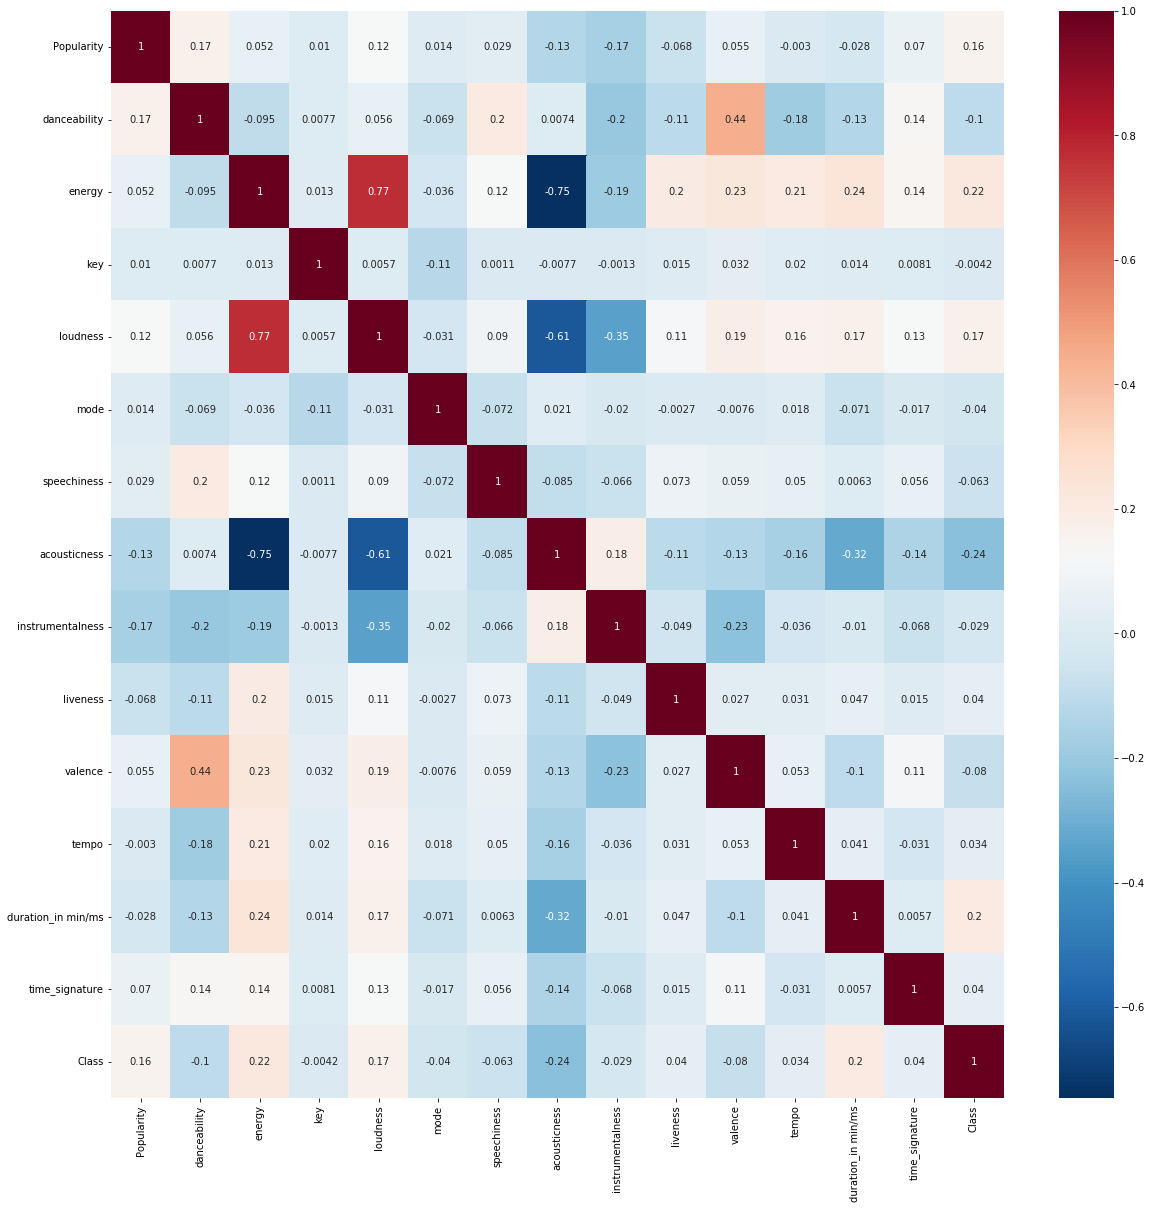

In [53]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True)

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data.

In [54]:
df['Track Name'] = LabelEncoder().fit_transform(df['Track Name'])

In [55]:
enc = OrdinalEncoder(categories=[df["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
df[['Artist Name']]=enc.fit_transform(df[['Artist Name']])

In [56]:
df['Artist Name']

0        7693
1        7886
2        6414
3        2323
4        5501
         ... 
14391    6075
14392    3243
14393    4213
14394    4577
14395    2340
Name: Artist Name, Length: 14396, dtype: int64

In [57]:
df['Track Name']

0         6755
1         4263
2        11474
3         6223
4         6441
         ...  
14391     4555
14392     2262
14393    10103
14394     7634
14395      953
Name: Track Name, Length: 14396, dtype: int32

In [58]:
len(df["Artist Name"].unique())

7913

In [59]:
df["Artist Name"].unique()

array([7693, 7886, 6414, ..., 4213, 4577, 2340], dtype=int64)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int64  
 1   Track Name          14396 non-null  int32  
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [61]:
music_features = df.drop("Class", axis = 1)
music_labels = df["Class"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(music_features, music_labels, test_size = 0.25, random_state=42)

In [66]:
X_train.shape

(10797, 16)

In [67]:
X_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
13416,7895,11931,31.0,0.457,0.534,7.0,-13.650,1,0.0300,0.08910,0.000006,0.183,0.424,94.117,293000.0,4
1511,6242,10730,9.0,0.804,0.693,7.0,-7.470,1,0.0915,0.00876,0.000916,0.314,0.654,95.721,170907.0,4
8374,6016,10751,43.0,0.414,0.482,7.0,-7.607,1,0.0287,0.65600,0.904000,0.233,0.112,127.983,232813.0,4
12911,7606,11595,54.0,0.410,0.529,11.0,-9.662,0,0.0390,0.40600,0.885000,0.110,0.828,160.060,178860.0,3
10182,7807,2732,46.0,0.318,0.405,7.0,-10.028,1,0.0328,0.30500,0.003730,0.117,0.296,180.305,198400.0,3


In [68]:
X_test.shape

(3599, 16)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10797 entries, 13416 to 7270
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         10797 non-null  int64  
 1   Track Name          10797 non-null  int32  
 2   Popularity          10546 non-null  float64
 3   danceability        10797 non-null  float64
 4   energy              10797 non-null  float64
 5   key                 9577 non-null   float64
 6   loudness            10797 non-null  float64
 7   mode                10797 non-null  int64  
 8   speechiness         10797 non-null  float64
 9   acousticness        10797 non-null  float64
 10  instrumentalness    8181 non-null   float64
 11  liveness            10797 non-null  float64
 12  valence             10797 non-null  float64
 13  tempo               10797 non-null  float64
 14  duration_in min/ms  10797 non-null  float64
 15  time_signature      10797 non-null  int64  
dtypes

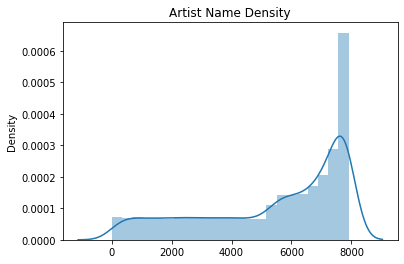

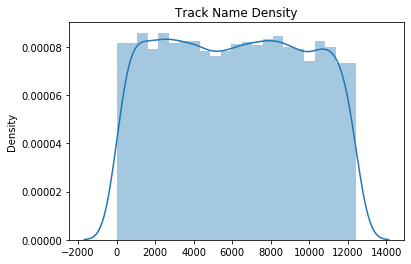

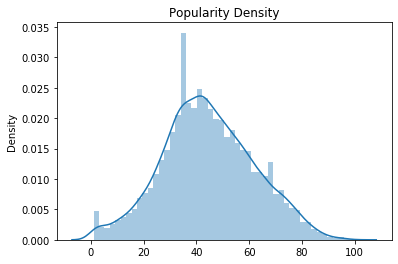

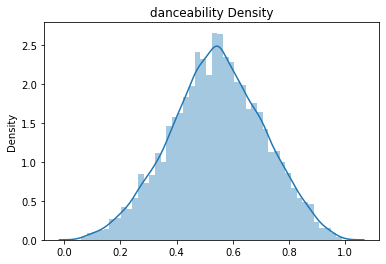

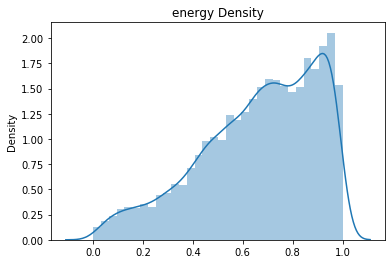

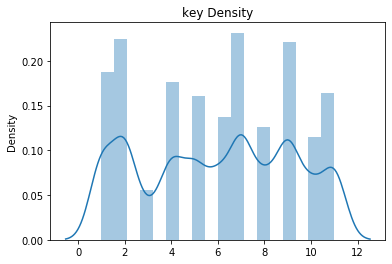

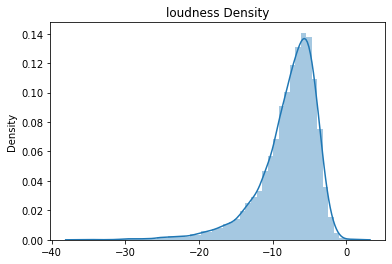

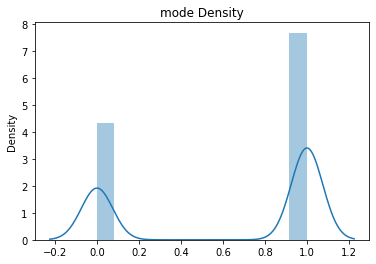

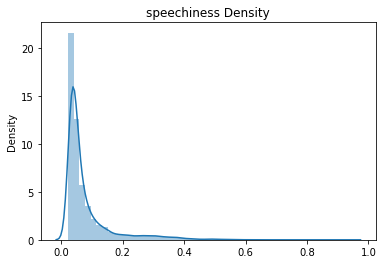

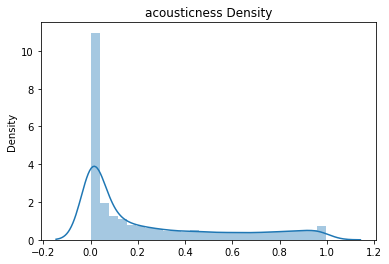

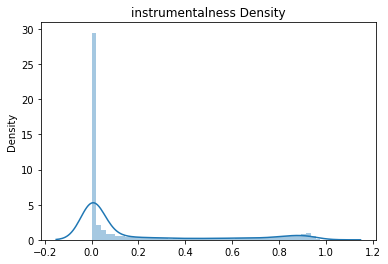

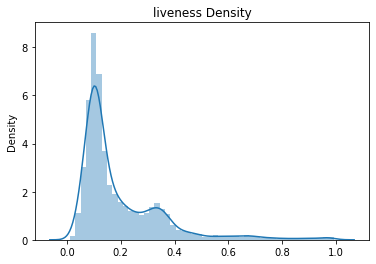

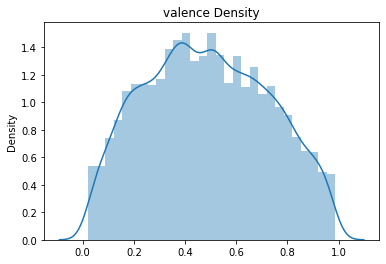

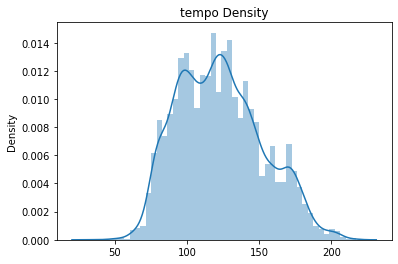

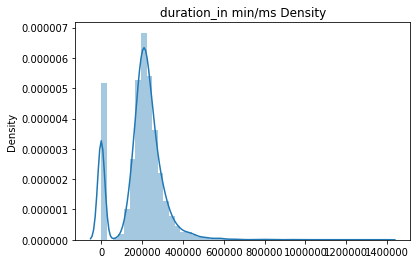

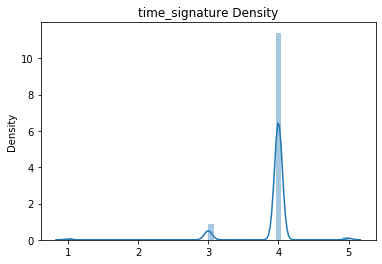

In [70]:
for i in X_train.columns:
    plt.figure()
    sns.distplot(x=X_train[i]).set(title=i+' Density')

In [71]:
def clean_data(df):
    df['Popularity'].fillna(float(X_train['Popularity'].min()), inplace=True)
    df['key'].fillna(int(X_train['key'].min()), inplace=True)
    df['instrumentalness'].fillna(float(X_train['instrumentalness'].mean()), inplace=True)
    return df

In [72]:
X_train = clean_data(X_train)
X_test = clean_data(X_test)

In [73]:
print(X_train.isnull().sum().sum())

0


In [74]:
print(X_test.isnull().sum().sum())

0


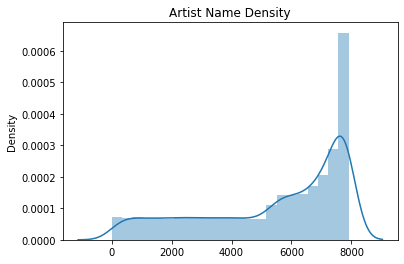

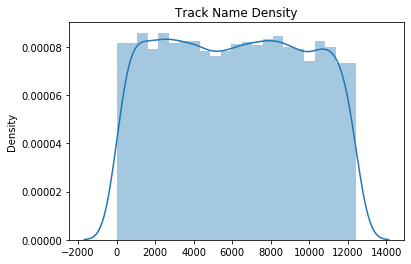

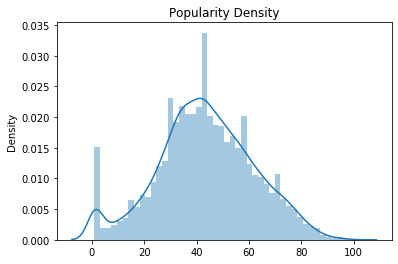

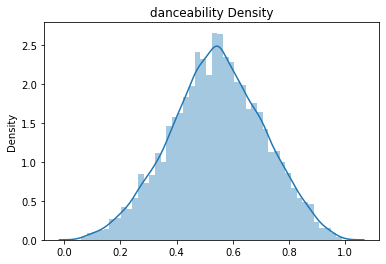

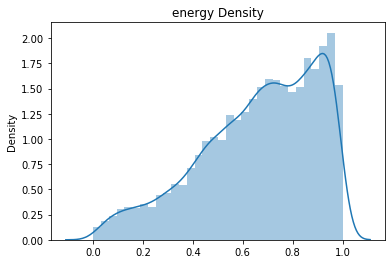

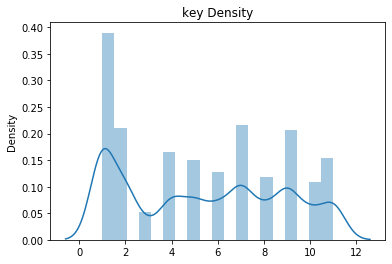

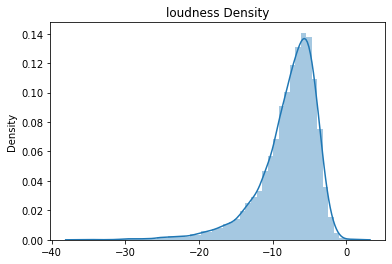

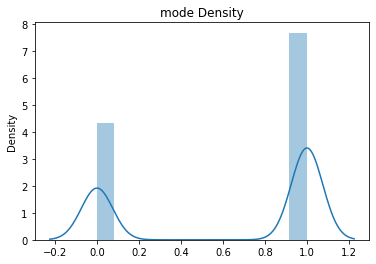

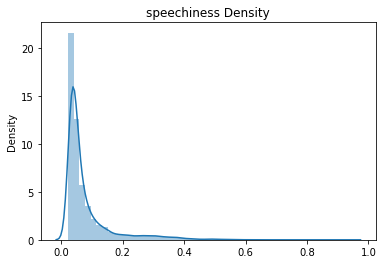

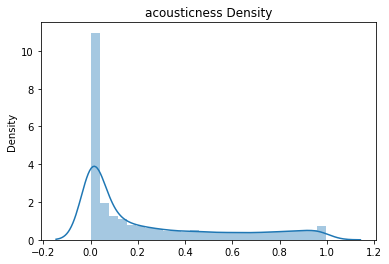

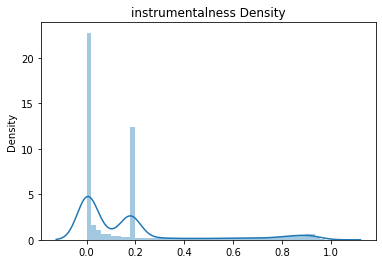

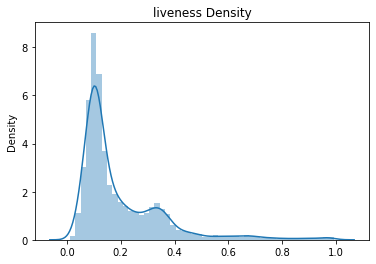

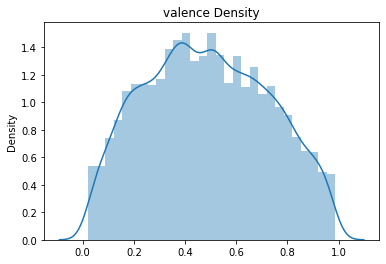

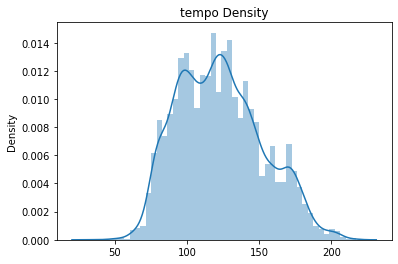

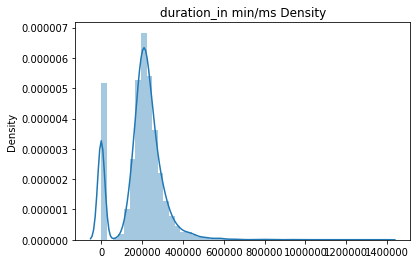

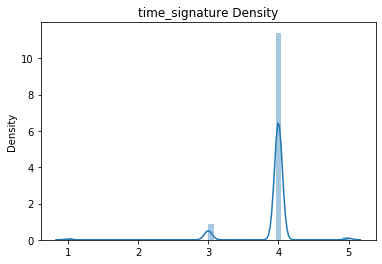

In [75]:
for i in X_train.columns:
    plt.figure()
    sns.distplot(x=X_train[i]).set(title=i+' Density')

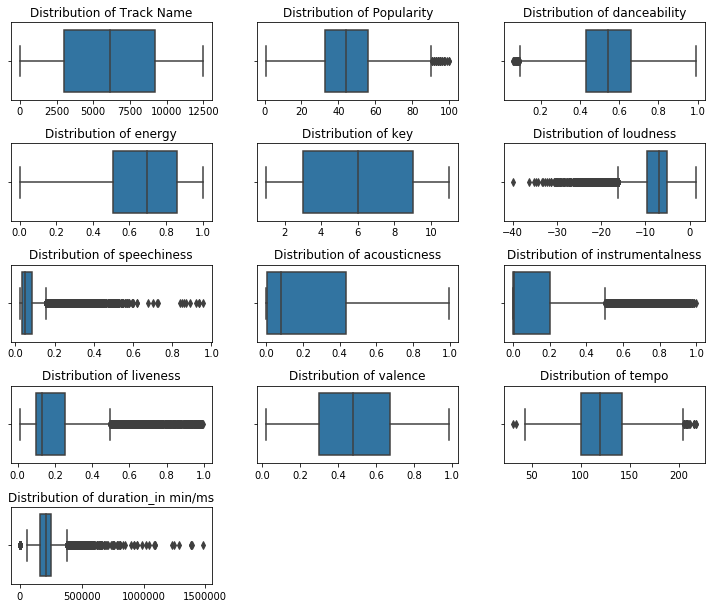

In [76]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [78]:
def outliers(df):
    df['Popularity'] = np.where(df['Popularity'] >= 90.5,90.5, df['Popularity'])

    df['danceability'] = np.where(df['danceability'] <0.092, 0.092, df['danceability'])

    df['loudness'] = np.where(df['loudness'] <-16.1, -16.1, df['loudness'])

    df['speechiness'] = np.where(df['speechiness'] >0.15, 0.15, df['speechiness'])

    df['instrumentalness'] = np.where(df['instrumentalness'] >0.45, 0.45, df['instrumentalness'])

    df['liveness'] = np.where(df['liveness'] > 0.5, 0.5, df['liveness'])
    
    df['tempo'] = np.where(df['tempo'] > 205.2, 205.2, df['tempo'])

    df['duration_in min/ms'] = np.where(df['duration_in min/ms'] > 380000,380000, df['duration_in min/ms'])

    return df

In [79]:
X_train = outliers(X_train)

In [80]:
X_test = outliers(X_test)

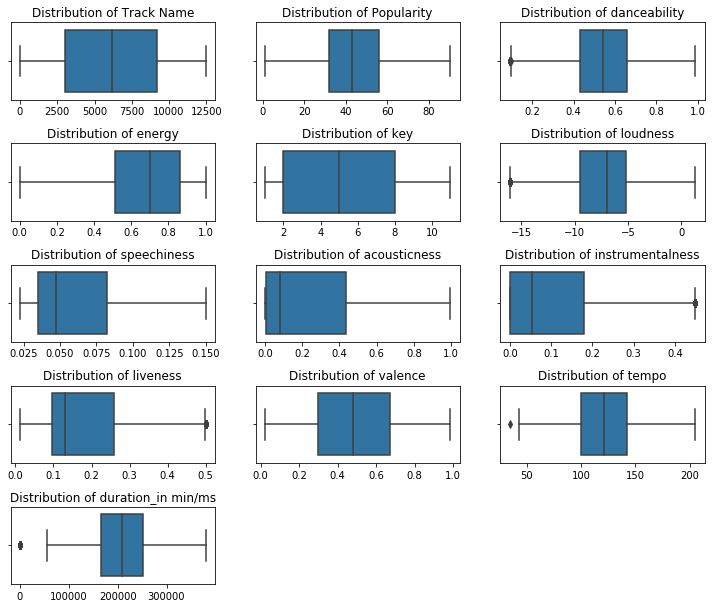

In [81]:
df_cont = X_train.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [82]:
# def outliers(df_data,var):
#     a = []
#     q1 =  df_data[var].quantile(.25)
#     q3 =  df_data[var].quantile(.75)
#     iqr = q3-q1
#     ulim = float(q3+(2.5*iqr))
#     llim = float(q1-(2.5*iqr))

#     for i in  df_data[var]:
#         if i > ulim:
#             i=np.NaN
#         elif i < llim:
#             i = np.NaN
#         else:
#             i=i
#         a.append(i)
#     return a

In [83]:
# for col in  X_train.columns:
#      X_train[col] = outliers(X_train,col)

In [84]:
# for col in  X_test.columns:
#      X_test[col] = outliers(X_test,col)

In [85]:
X_train.isna().sum().sum()

0

In [86]:
X_test.isna().sum().sum()

0

In [87]:
# for i in  X_train.columns:
#     X_train[i]=X_train[i].fillna(X_train[i].mean())

In [88]:
# for i in  X_test.columns:
#     X_test[i]=X_test[i].fillna(X_train[i].mean())

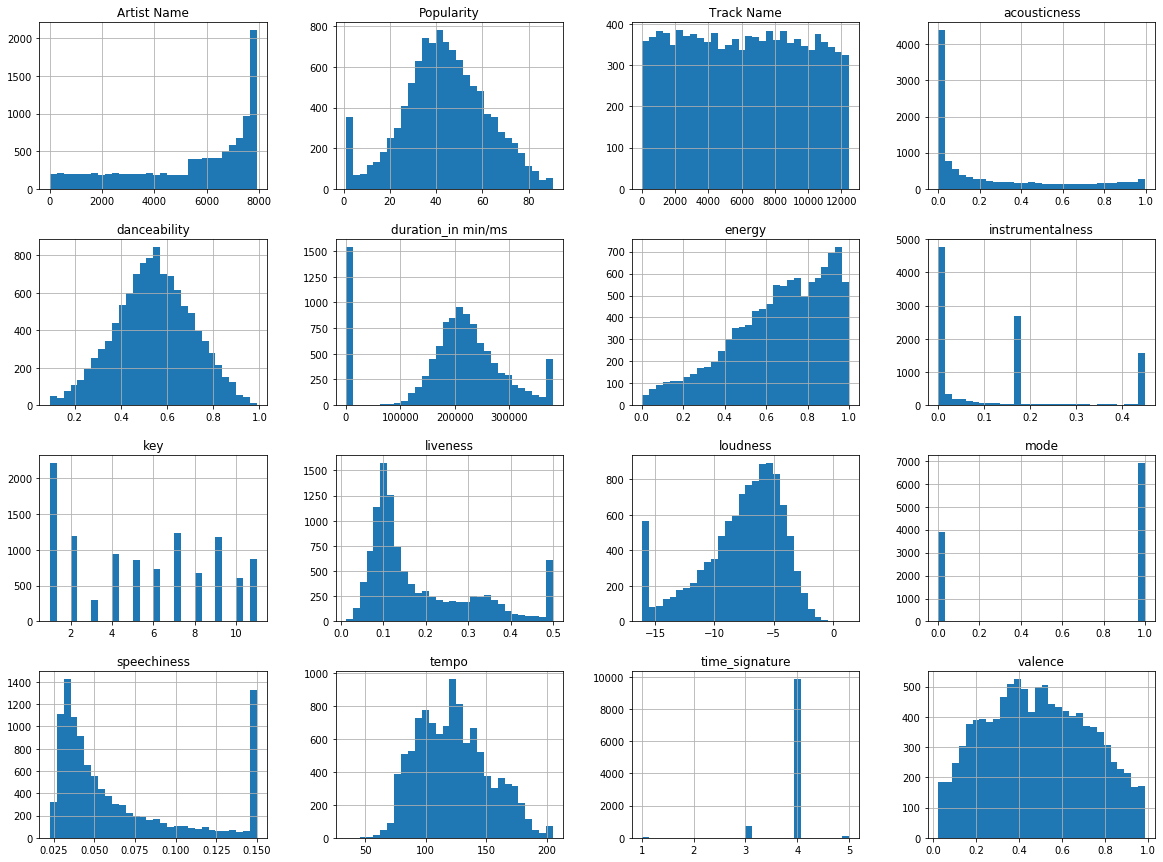

In [89]:
X_train.hist(bins=30, figsize=(20,15))
plt.show()

## Scale features
Scaling data means to make all values in all variables within the same range. MinMaxScaler() (i.e., to make all values between 0 and 1) is the most widely used scaling technique. However, StandardScaler() handles much better datasets with outliers. It makes all values centered around 0 with standard deviation of 1. The steps are executed below.

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)

In [94]:
X_train_scaled =  pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [95]:
X_train_scaled

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
13416,1.038040,1.615892,-0.677048,-0.522178,-0.550767,0.473859,-1.722038,0.750615,-0.863353,-0.506796,-0.837890,-0.023928,-0.261173,-0.978183,0.983920,0.213042
1511,0.348112,1.280272,-1.873893,1.580733,0.124733,0.473859,0.067835,0.750615,0.651843,-0.764868,-0.832151,1.019164,0.698486,-0.923691,-0.259907,0.213042
8374,0.253784,1.286140,-0.024223,-0.782770,-0.771685,0.473859,0.028157,0.750615,-0.895382,1.314230,1.998689,0.374199,-1.562971,0.172327,0.370763,0.213042
12911,0.917417,1.521996,0.574199,-0.807011,-0.572009,1.654284,-0.567019,-1.332241,-0.641617,0.511167,1.998689,-0.605192,1.424489,1.262061,-0.178885,-2.568352
10182,1.001310,-0.954774,0.138983,-1.364555,-1.098813,0.473859,-0.673022,0.750615,-0.794369,0.186730,-0.814412,-0.549455,-0.795244,1.949833,0.020179,-2.568352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.826393,-0.245529,-1.928295,0.380801,-0.712207,-0.116353,-0.931366,0.750615,0.486773,1.754309,0.294661,-0.629080,0.932142,-1.075038,1.240972,0.213042
13418,0.964581,0.610429,0.193385,-0.304009,0.995660,1.064071,1.269483,0.750615,-0.685965,-0.792304,-0.837238,-0.103553,0.206140,0.106795,-0.059712,0.213042
5390,0.161126,0.707118,0.900612,0.483826,0.944679,-1.296778,1.349708,0.750615,-0.607125,-0.714307,0.294661,0.485674,0.927970,-1.049389,0.326488,0.213042
860,0.043843,1.395405,0.683004,1.580733,0.447613,-1.296778,0.587709,-1.332241,2.093128,-0.695997,0.294661,0.796213,1.624766,-1.490317,-0.328978,0.213042


In [96]:
X_test_scaled= scaler.transform(X_test)

In [97]:
X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [98]:
X_test_scaled.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
10146,-1.598544,1.048048,1.825447,0.665634,0.617550,-1.296778,1.056320,0.750615,-0.434664,-0.169830,0.294661,-0.167253,0.264554,-1.042866,0.146229,0.213042
9453,-0.765873,-0.144367,-1.438677,0.132330,-0.011217,-1.001672,-0.560937,0.750615,-0.629299,-0.764226,-0.100405,-0.949970,-0.615829,1.261789,0.046667,0.213042
3753,-0.895260,0.306945,1.009416,0.508067,-1.213521,-1.296778,-0.404251,-1.332241,-0.661327,0.019693,-0.837269,-0.342429,-1.108176,-1.526328,0.656666,0.213042
1662,0.606470,-1.487966,-0.078625,-1.546363,-0.147166,-1.001672,1.289467,0.750615,-0.641617,-0.792291,-0.837900,0.605112,-0.916244,1.604843,-0.078436,0.213042
8817,-0.339729,0.742050,0.084581,-0.467636,-2.135429,-1.001672,-2.024984,0.750615,-0.493793,2.383911,1.998689,-0.525567,-0.686760,0.166314,-2.001000,-2.568352


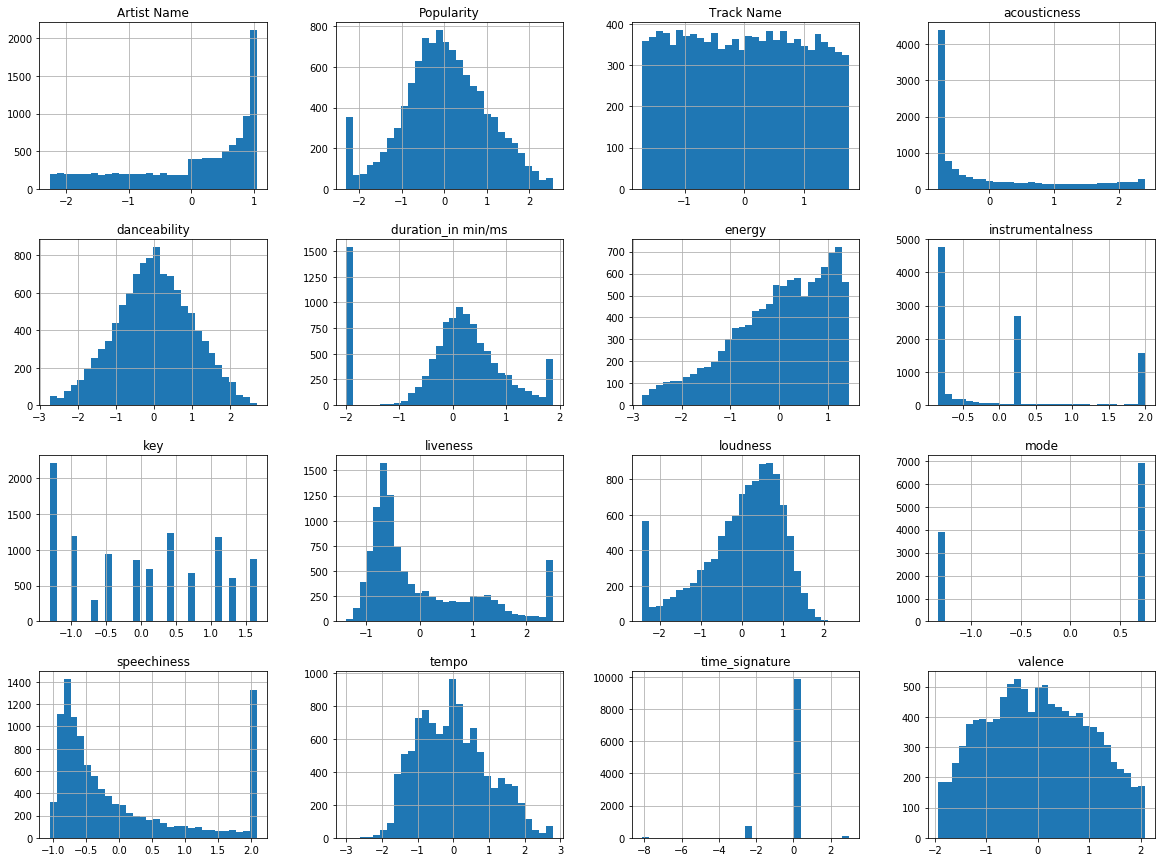

In [99]:
X_train_scaled.hist(bins=30, figsize=(20,15))
plt.show()

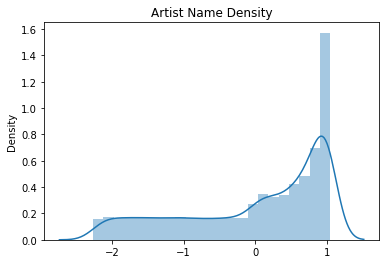

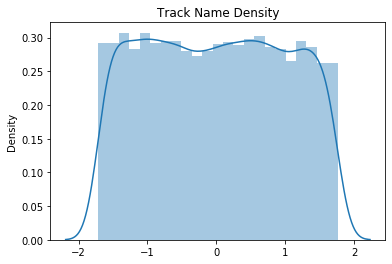

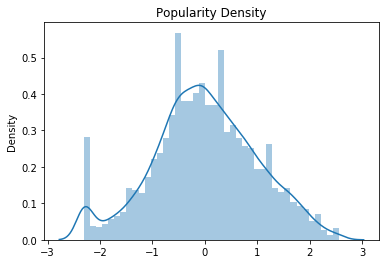

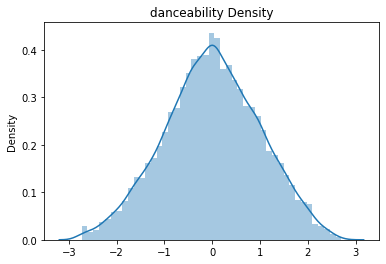

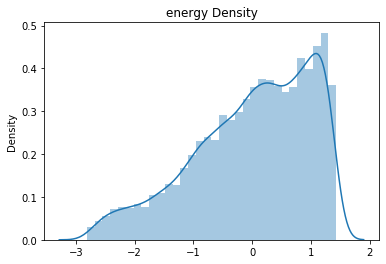

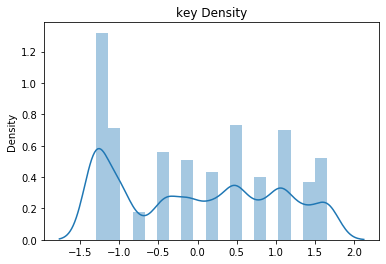

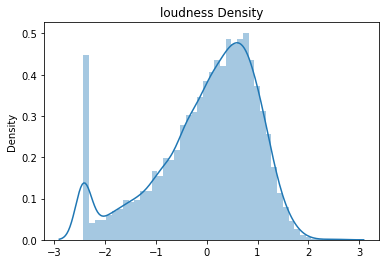

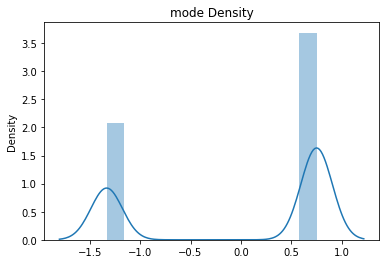

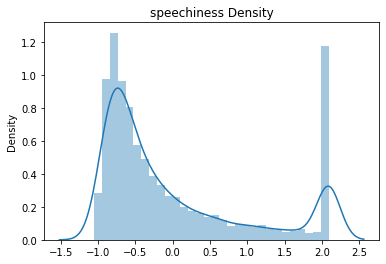

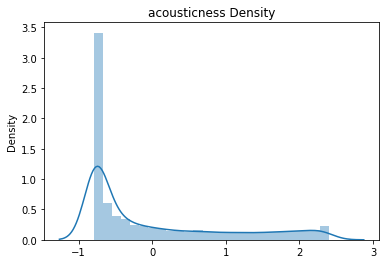

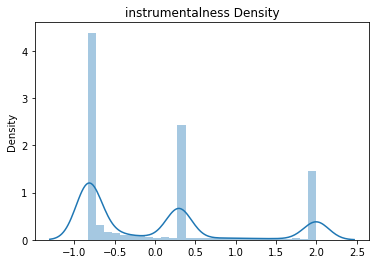

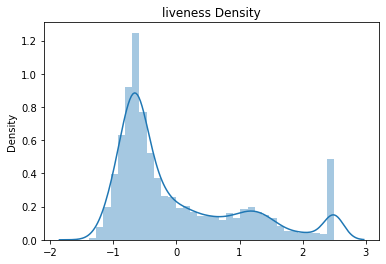

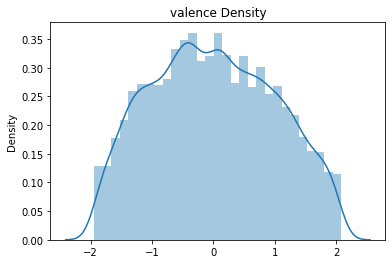

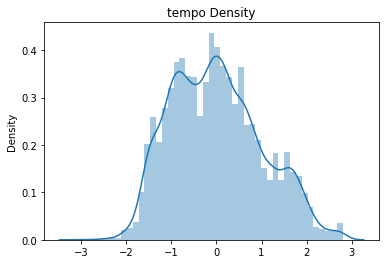

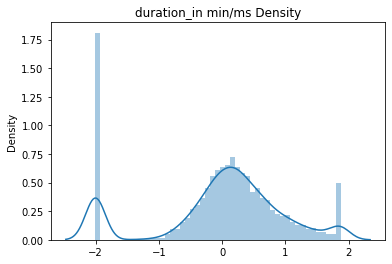

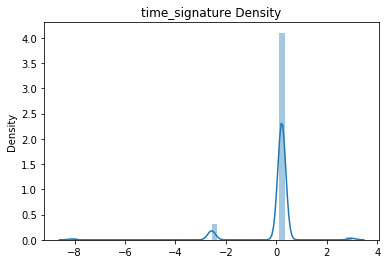

In [53]:
for i in X_train_scaled.columns:
    plt.figure()
    sns.distplot(x=X_train_scaled[i]).set(title=i+' Density')

In [54]:
only_training_data = X_train_scaled.join(y_train)

In [55]:
only_training_data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
13416,1.038029,1.615892,-0.677048,-0.522178,-0.550767,0.473859,-1.722038,0.750615,-0.863353,-0.506796,-0.837890,-0.023928,-0.261173,-0.978183,0.983920,0.213042,10
1511,-0.017248,1.280272,-1.873893,1.580733,0.124733,0.473859,0.067835,0.750615,0.651843,-0.764868,-0.832151,1.019164,0.698486,-0.923691,-0.259907,0.213042,10
8374,0.048053,1.286140,-0.024223,-0.782770,-0.771685,0.473859,0.028157,0.750615,-0.895382,1.314230,1.998689,0.374199,-1.562971,0.172327,0.370763,0.213042,6
12911,0.885242,1.521996,0.574199,-0.807011,-0.572009,1.654284,-0.567019,-1.332241,-0.641617,0.511167,1.998689,-0.605192,1.424489,1.262061,-0.178885,-2.568352,6
10182,1.003285,-0.954774,0.138983,-1.364555,-1.098813,0.473859,-0.673022,0.750615,-0.794369,0.186730,-0.814412,-0.549455,-0.795244,1.949833,0.020179,-2.568352,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-0.623791,-0.245529,-1.928295,0.380801,-0.712207,-0.116353,-0.931366,0.750615,0.486773,1.754309,0.294661,-0.629080,0.932142,-1.075038,1.240972,0.213042,5
13418,0.963937,0.610429,0.193385,-0.304009,0.995660,1.064071,1.269483,0.750615,-0.685965,-0.792304,-0.837238,-0.103553,0.206140,0.106795,-0.059712,0.213042,1
5390,0.462461,0.707118,0.900612,0.483826,0.944679,-1.296778,1.349708,0.750615,-0.607125,-0.714307,0.294661,0.485674,0.927970,-1.049389,0.326488,0.213042,10
860,-0.001760,1.395405,0.683004,1.580733,0.447613,-1.296778,0.587709,-1.332241,2.093128,-0.695997,0.294661,0.796213,1.624766,-1.490317,-0.328978,0.213042,5


In [56]:
#How each feature affects the price of diamonds
corr_matrix = only_training_data.corr()
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.236970
energy                0.217084
duration_in min/ms    0.213606
loudness              0.196696
Popularity            0.164484
Artist Name           0.119413
danceability          0.101914
valence               0.082790
Track Name            0.069697
time_signature        0.046798
liveness              0.041193
mode                  0.038571
tempo                 0.029107
instrumentalness      0.025060
speechiness           0.016429
key                   0.003031
Name: Class, dtype: float64

In [57]:
# pca = PCA(n_components = 16)
# X_train_scaled = pca.fit_transform(X_train_scaled)

In [85]:
# X_train_scaled =  pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [86]:
# X_test_scaled = pca.transform(X_test_scaled)

In [87]:
# X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [88]:
# X_train_scaled.hist(bins=30, figsize=(20,15))
# plt.show()

# Feature Selection

In [89]:
only_training_data = X_train_scaled.join(y_train)

In [90]:
#How each feature affects the price of diamonds
corr_matrix = only_training_data.corr()
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.236970
energy                0.217084
duration_in min/ms    0.213606
loudness              0.196696
Popularity            0.164484
Artist Name           0.116044
danceability          0.101914
valence               0.082790
Track Name            0.069697
time_signature        0.046798
liveness              0.041193
mode                  0.038571
tempo                 0.029107
instrumentalness      0.025060
speechiness           0.016429
key                   0.003031
Name: Class, dtype: float64

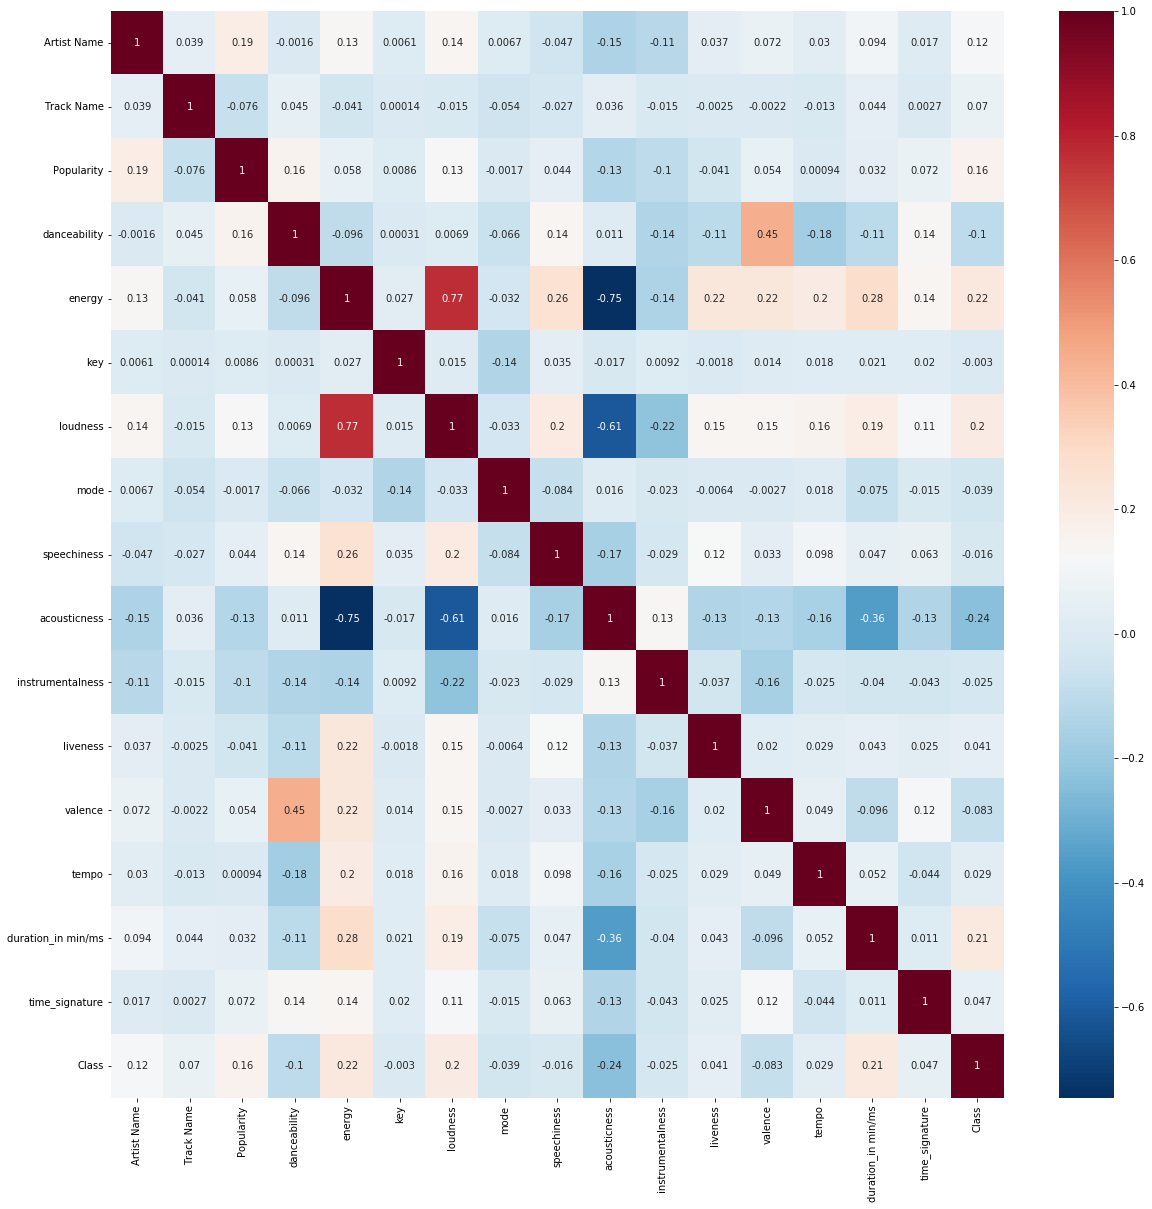

In [91]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True)

In [58]:
X_train_scaled.drop(columns=['key'], axis=1, inplace=True)

In [59]:
X_test_scaled.drop(columns=['key'], axis=1, inplace=True)

# Modelling Algos

In [78]:
model = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='liblinear',max_iter= 500))
y_pred = model.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [79]:
model.score(X_train_scaled,y_train)

0.5608965453366676

In [80]:
model.score(X_test_scaled,y_test)

0.5393164767991109

In [81]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1: 0.51


In [83]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[101   0   0   8   7   0   0   8   0   4   3]
 [  0   5  10   0   0  16  51   1  15  22 135]
 [  0   1 118   0   0   8  31   0   8  29  91]
 [  8   0   0  69   2   1   0   6   0   4   0]
 [ 16   0   0   3  51   0   0   1   0   9   5]
 [  0   0   4   1   0 202  11   0   1  53  20]
 [  0   7  22   0   0  41 145   0  28  43 223]
 [  3   0   0   5   1   0   0 100   0   0   0]
 [  0   2   1   0   0   2  11   0 189   3 151]
 [  3   1  16   2   7  51  37   1   3 267 114]
 [  1   2  35   2   8  25  58   0  82  74 694]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       131
           1       0.28      0.02      0.04       255
           2       0.57      0.41      0.48       286
           3       0.77      0.77      0.77        90
           4       0.67      0.60      0.63        85
           5       0.58      0.69      0.63       292
           6       0.42      0.28      0.34       509
         

In [111]:
knn = KNeighborsClassifier(n_neighbors=45).fit(X_train_scaled,y_train)
y_predictknn = knn.predict(X_test_scaled)
knn.score(X_train_scaled,y_train)

0.523200889135871

In [112]:
knn.score(X_test_scaled,y_test)

0.5087524312308974

In [113]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predictknn)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predictknn,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predictknn,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predictknn,average='weighted')))

Accuracy: 0.51
Precision: 0.49
Recall: 0.51
F1: 0.48


In [114]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predictknn))

print("Classification Report")
print(classification_report(y_test, y_predictknn))

Confusion Matrix:
[[104   0   0   2   8   0   1   8   0   4   4]
 [  0   1   4   0   0  13  45   4  14  17 157]
 [  0   2  71   0   0   9  36   2  11  28 127]
 [ 17   0   0  51   2   1   1   9   0   6   3]
 [ 16   0   0   2  48   0   0   0   0  13   6]
 [  1   0   4   1   0 202  11   0   2  39  32]
 [  0   3  10   1   0  48 132   5  24  31 255]
 [  5   0   0   2   0   0   0 102   0   0   0]
 [  0   0   0   0   0   5   9   0 152   2 191]
 [  3   0  14   1   8  55  33   2   3 234 149]
 [  4   5  15   0   8  23  53   1  82  56 734]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       131
           1       0.09      0.00      0.01       255
           2       0.60      0.25      0.35       286
           3       0.85      0.57      0.68        90
           4       0.65      0.56      0.60        85
           5       0.57      0.69      0.62       292
           6       0.41      0.26      0.32       509
         

In [160]:
clf_all = DecisionTreeClassifier(max_depth=8,random_state=42)
clf_all.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [161]:
clf_all.score(X_train_scaled,y_train)

0.5516347133462999

In [162]:
clf_all.score(X_test_scaled,y_test)

0.495415393164768

In [163]:
print(clf_all.feature_importances_)

[0.10023952 0.04296123 0.09619765 0.02155738 0.09210258 0.02313582
 0.00070242 0.11266396 0.13284324 0.13529462 0.01595625 0.05216223
 0.00692049 0.16667522 0.0005874 ]


In [164]:
y_pred = clf_all.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [165]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.50
Precision: 0.49
Recall: 0.50
F1: 0.47


In [166]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 89   0   0  11  19   0   0  10   0   1   1]
 [  0   1  20   0   0   8  44   0   8   2 172]
 [  0   1 130   0   0   3  31   0   3   1 117]
 [ 16   0   0  57   8   0   0   7   0   0   2]
 [ 17   0   0   1  60   0   0   0   0   1   6]
 [  0   2   7   0   0 182  12   0   1  31  57]
 [  0   9  52   0   0  28 109   0  16   7 288]
 [  5   0   0   7   0   0   0  97   0   0   0]
 [  0   1   5   0   0   3  13   0 143   1 193]
 [ 10   1  33   3   4  37  19   1   1 186 207]
 [  6   3  57   0  11  26  49   0  54  46 729]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       131
           1       0.06      0.00      0.01       255
           2       0.43      0.45      0.44       286
           3       0.72      0.63      0.67        90
           4       0.59      0.71      0.64        85
           5       0.63      0.62      0.63       292
           6       0.39      0.21      0.28       509
         

In [77]:
poly_kernel_svm_clf = make_pipeline(PolynomialFeatures(), SVC(kernel="poly", degree=2, coef0=1, C=0.5, probability=True))
poly_kernel_svm_clf.fit(X_train_scaled,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('svc',
                 SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=2,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [78]:
y_pred = poly_kernel_svm_clf.predict(X_test_scaled)

In [79]:
poly_kernel_svm_clf.score(X_train_scaled,y_train)

0.5927572473835324

In [80]:
poly_kernel_svm_clf.score(X_test_scaled,y_test)

0.5343150875243123

In [81]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.53
Precision: 0.54
Recall: 0.53
F1: 0.50


In [82]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[114   0   0   4   5   0   0   4   0   3   1]
 [  0   3   4   0   0  11  42   0   7  19 169]
 [  0   0  79   0   0   5  25   0   4  23 150]
 [ 14   0   0  63   2   0   0   5   0   5   1]
 [ 20   0   0   1  50   0   0   0   0  12   2]
 [  0   0   1   0   0 205   6   0   1  53  26]
 [  0   4  13   0   0  36 125   0  17  37 277]
 [  6   0   0   4   1   0   0  98   0   0   0]
 [  0   0   0   0   0   2  14   0 150   2 191]
 [  4   0  10   2   5  45  35   2   0 269 130]
 [  3   2  20   2   8  24  48   0  56  51 767]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       131
           1       0.33      0.01      0.02       255
           2       0.62      0.28      0.38       286
           3       0.83      0.70      0.76        90
           4       0.70      0.59      0.64        85
           5       0.62      0.70      0.66       292
           6       0.42      0.25      0.31       509
         

In [160]:
linear = SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train_scaled, y_train)
rbf = SVC(kernel='rbf', gamma=0.05, C=0.5, decision_function_shape='ovo').fit(X_train_scaled, y_train)
poly =SVC(kernel='poly', degree=2, coef0=1, C=0.05, decision_function_shape='ovo').fit(X_train_scaled, y_train)

In [161]:
linear_pred = linear.predict(X_test_scaled)
poly_pred = poly.predict(X_test_scaled)
rbf_pred = rbf.predict(X_test_scaled)

In [162]:
accuracy_lin = linear.score(X_train_scaled, y_train)
accuracy_poly = poly.score(X_train_scaled, y_train)
accuracy_rbf = rbf.score(X_train_scaled, y_train)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)

Accuracy Linear Kernel: 0.5042141335556173
Accuracy Polynomial Kernel: 0.5183847365008799
Accuracy Radial Basis Kernel: 0.5534870797443734


In [163]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test_scaled, y_test)
accuracy_poly = poly.score(X_test_scaled, y_test)
accuracy_rbf = rbf.score(X_test_scaled, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)

Accuracy Linear Kernel: 0.5015282022784107
Accuracy Polynomial Kernel: 0.5073631564323423
Accuracy Radial Basis Kernel: 0.5279244234509586


In [164]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, linear_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, linear_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, linear_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, linear_pred,average='weighted')))

Accuracy: 0.50
Precision: 0.47
Recall: 0.50
F1: 0.47


In [165]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, poly_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, poly_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, poly_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, poly_pred,average='weighted')))

Accuracy: 0.51
Precision: 0.50
Recall: 0.51
F1: 0.47


In [167]:
#rbf_pred
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rbf_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, rbf_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, rbf_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, rbf_pred,average='weighted')))

Accuracy: 0.53
Precision: 0.50
Recall: 0.53
F1: 0.49


In [168]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, linear_pred))

print("Classification Report")
print(classification_report(y_test, linear_pred))

Confusion Matrix:
[[ 96   0   0   5   7   0   0   8   0  13   2]
 [  0   0   6   0   0  18  32   0  14  21 164]
 [  0   0  78   0   0   8  23   0   6  31 140]
 [ 16   0   0  57   2   0   0   8   0   7   0]
 [ 16   0   0   3  46   0   0   0   0  14   6]
 [  0   0   1   0   0 204  12   0   3  45  27]
 [  0   0  17   0   0  55  98   0  24  52 263]
 [  7   0   0   2   0   0   0 100   0   0   0]
 [  0   0   1   0   0   6   7   0 173   2 170]
 [ 10   0  11   1   9  57  28   1   0 232 153]
 [  1   0  24   3  11  31  40   0  79  71 721]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       131
           1       0.00      0.00      0.00       255
           2       0.57      0.27      0.37       286
           3       0.80      0.63      0.71        90
           4       0.61      0.54      0.57        85
           5       0.54      0.70      0.61       292
           6       0.41      0.19      0.26       509
         

In [169]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, poly_pred))

print("Classification Report")
print(classification_report(y_test, poly_pred))

Confusion Matrix:
[[106   0   0   4   8   0   0   2   0   9   2]
 [  0   0   2   0   0  16  31   0   7  22 177]
 [  0   0  65   0   0   8  21   0   8  27 157]
 [ 17   0   0  60   2   0   0   5   0   6   0]
 [ 20   0   0   2  37   0   0   0   0  23   3]
 [  0   0   0   0   0 205   7   0   1  49  30]
 [  0   0   9   1   0  53  98   1  16  40 291]
 [  7   0   0   2   0   0   0 100   0   0   0]
 [  0   0   0   0   0   5   4   0 142   2 206]
 [  7   0   6   1   8  57  28   1   0 239 155]
 [  3   0  12   2  14  29  27   0  56  64 774]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       131
           1       0.00      0.00      0.00       255
           2       0.69      0.23      0.34       286
           3       0.83      0.67      0.74        90
           4       0.54      0.44      0.48        85
           5       0.55      0.70      0.62       292
           6       0.45      0.19      0.27       509
         

In [182]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rbf_pred))

print("Classification Report")
print(classification_report(y_test, rbf_pred))

Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0 131]
 [  0   0   0   0   0   0   0   0   0   0 255]
 [  0   0   0   0   0   0   0   0   0   0 286]
 [  0   0   0   0   0   0   0   0   0   0  90]
 [  0   0   0   0   0   0   0   0   0   0  85]
 [  0   0   0   0   0   0   0   0   0   0 292]
 [  0   0   0   0   0   0   0   0   0   0 509]
 [  0   0   0   0   0   0   0   0   0   0 109]
 [  0   0   0   0   0   0   0   0   0   0 359]
 [  0   0   0   0   0   0   0   0   0   0 502]
 [  0   0   0   0   0   0   0   0   0   0 981]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       255
           2       0.00      0.00      0.00       286
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00       292
           6       0.00      0.00      0.00       509
         

In [170]:
param_grid = {
    'n_estimators': [120],
    'max_depth': [7],
    'max_features': ['log2'],
    'min_samples_leaf': [3],
    'min_samples_split': [5],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [171]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [178]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 120}
Grid best score (accuracy):  0.5165337175990257


In [179]:
finalRandom1 = grid_search.best_estimator_

In [180]:
finalRandom1.score(X_train_scaled,y_train)

0.5538575530239881

In [181]:
finalRandom1.score(X_test_scaled,y_test)

0.5168102250625174

In [182]:
y_predRandom1 = finalRandom1.predict(X_test_scaled)

In [183]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.52
Precision: 0.54
Recall: 0.52
F1: 0.47


In [184]:
cm1 = confusion_matrix(y_test, y_predRandom1)

In [185]:
cm1

array([[114,   0,   0,   4,   7,   0,   0,   4,   0,   2,   0],
       [  0,   0,   0,   0,   0,  10,  47,   0,  10,   6, 182],
       [  0,   0,   7,   0,   0,   3,  33,   0,   2,  14, 227],
       [ 18,   0,   0,  60,   2,   0,   0,   9,   0,   1,   0],
       [ 20,   0,   0,   1,  55,   0,   0,   0,   0,   7,   2],
       [  0,   0,   0,   0,   0, 194,   7,   0,   0,  48,  43],
       [  0,   0,   0,   0,   0,  39, 110,   0,  14,  25, 321],
       [  6,   0,   0,   2,   0,   0,   0, 101,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,   8,   0, 172,   0, 176],
       [  8,   0,   0,   3,   4,  39,  25,   0,   0, 230, 193],
       [  5,   0,   1,   0,   7,  25,  33,   0,  58,  35, 817]],
      dtype=int64)

In [186]:
print(classification_report(y_test, y_predRandom1))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75       131
           1       0.00      0.00      0.00       255
           2       0.88      0.02      0.05       286
           3       0.86      0.67      0.75        90
           4       0.73      0.65      0.69        85
           5       0.62      0.66      0.64       292
           6       0.42      0.22      0.28       509
           7       0.89      0.93      0.91       109
           8       0.67      0.48      0.56       359
           9       0.62      0.46      0.53       502
          10       0.42      0.83      0.56       981

    accuracy                           0.52      3599
   macro avg       0.62      0.53      0.52      3599
weighted avg       0.54      0.52      0.47      3599



In [187]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=5, max_depth=2, random_state=0)
gb_clf2.fit(X_train_scaled, y_train)
predictions = gb_clf2.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[103   0   0   9  15   0   0   4   0   0   0]
 [  0   0   8   0   0  12  66   0  16  18 135]
 [  0   1 122   0   0   3  40   0   4  11 105]
 [ 14   0   0  68   2   1   0   4   0   1   0]
 [ 13   0   0   3  62   0   0   0   0   3   4]
 [  0   0   5   0   0 202  15   0   1  50  19]
 [  0   2  27   0   0  36 178   0  24  30 212]
 [  4   0   0   5   0   0   0 100   0   0   0]
 [  0   0   1   0   0   2  16   0 200   2 138]
 [  7   0  12   3   5  39  48   0   1 279 108]
 [  3   1  35   0  12  20  73   0  87  65 685]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       131
           1       0.00      0.00      0.00       255
           2       0.58      0.43      0.49       286
           3       0.77      0.76      0.76        90
           4       0.65      0.73      0.69        85
           5       0.64      0.69      0.67       292
           6       0.41      0.35      0.38       509
         

In [209]:
param_grid2 = {'n_estimators': [100],
              'learning_rate': [0.01],
               'max_features': [9],
               'max_depth': [4]
               }
grid2 = GridSearchCV(gb_clf2, param_grid2, cv=5)

In [210]:
grid2.fit(X_train_scaled, y_train)
print('Grid best parameter (max. accuracy): ', grid2.best_params_)
print('Grid best score (accuracy): ', grid2.best_score_)

Grid best parameter (max. accuracy):  {'learning_rate': 0.01, 'max_depth': 4, 'max_features': 9, 'n_estimators': 100}
Grid best score (accuracy):  0.5276467586159573


In [211]:
finalBoosting = grid2.best_estimator_

In [212]:
filename = 'finalBoosting_model.sav'
pickle.dump(finalBoosting, open(filename, 'wb'))

In [213]:
finalBoosting= pickle.load(open('finalBoosting_model.sav','rb'))

In [221]:
finalBoosting.score(X_train_scaled,y_train)

0.567379827729925

In [222]:
finalBoosting.score(X_test_scaled,y_test)

0.5240344540150041

In [223]:
y_predBoosting = finalBoosting.predict(X_test_scaled)

In [224]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predBoosting)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predBoosting,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predBoosting,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predBoosting,average='weighted')))

Accuracy: 0.52
Precision: 0.53
Recall: 0.52
F1: 0.49


In [225]:
cmBoosting = confusion_matrix(y_test, y_predBoosting)

In [226]:
cmBoosting

array([[101,   0,   0,   4,  13,   0,   0,   5,   0,   0,   8],
       [  0,   0,   7,   0,   0,  12,  39,   0,  10,   4, 183],
       [  0,   0,  73,   0,   0,   2,  29,   0,   1,   0, 181],
       [ 13,   0,   0,  56,   3,   0,   0,   5,   0,   0,  13],
       [ 18,   0,   0,   0,  53,   0,   0,   0,   0,   2,  12],
       [  0,   0,   3,   0,   0, 199,   8,   0,   0,  28,  54],
       [  0,   1,  11,   0,   0,  34, 124,   0,  14,  15, 310],
       [  4,   0,   0,   5,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  11,   0, 162,   1, 182],
       [  8,   1,   7,   2,   6,  41,  29,   0,   0, 203, 205],
       [  0,   0,  15,   0,   6,  20,  39,   0,  58,  28, 815]],
      dtype=int64)

In [227]:
print("Classification Report")
print(classification_report(y_test, y_predBoosting))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       131
           1       0.00      0.00      0.00       255
           2       0.63      0.26      0.36       286
           3       0.84      0.62      0.71        90
           4       0.65      0.62      0.64        85
           5       0.64      0.68      0.66       292
           6       0.44      0.24      0.31       509
           7       0.91      0.92      0.91       109
           8       0.66      0.45      0.54       359
           9       0.72      0.40      0.52       502
          10       0.42      0.83      0.55       981

    accuracy                           0.52      3599
   macro avg       0.60      0.53      0.54      3599
weighted avg       0.53      0.52      0.49      3599



In [118]:
# fit model no training data
model = XGBClassifier(max_depth=2)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [119]:
# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

In [120]:
model.score(X_train_scaled,y_train)

0.627581735667315

In [121]:
model.score(X_test_scaled,y_test)

0.5709919422061683

In [122]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.57
Precision: 0.54
Recall: 0.57
F1: 0.55


In [123]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       131
           1       0.00      0.00      0.00       255
           2       0.59      0.46      0.52       286
           3       0.80      0.79      0.79        90
           4       0.72      0.75      0.74        85
           5       0.64      0.71      0.67       292
           6       0.41      0.36      0.38       509
           7       0.93      0.93      0.93       109
           8       0.62      0.58      0.60       359
           9       0.62      0.58      0.60       502
          10       0.51      0.70      0.59       981

    accuracy                           0.57      3599
   macro avg       0.60      0.61      0.60      3599
weighted avg       0.54      0.57      0.55      3599



# learning_curve for XGBClassifier

In [1]:
from sklearn.model_selection import learning_curve
N, train_lc, val_lc = learning_curve(model,
                                     X_train_scaled, y_train,scoring='f1_macro',cv=5,
                                     train_sizes=np.linspace(0.1, 1, 30))


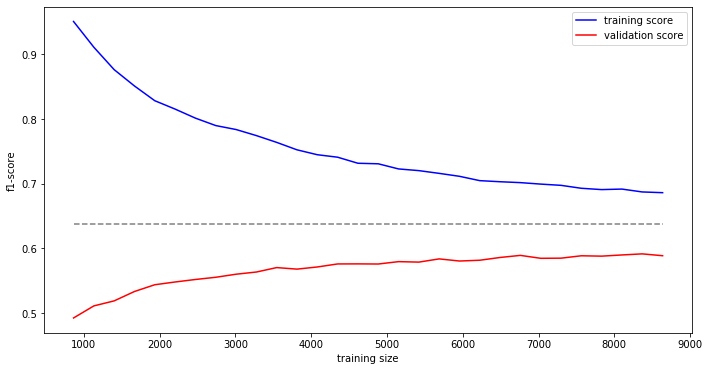

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('f1-score')
ax.legend(loc='best')

In [71]:
kfold = KFold(n_splits=10, shuffle=True)       

# cross validation score

In [80]:
kf_cv_scores = cross_val_score(model, X_train_scaled, y_train,scoring='f1_macro', cv=kfold )

In [81]:
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.59


# Validation Curve

In [127]:
param_range = np.arange(1, 100, 10)

train_score, val_score = validation_curve(model,
                                  X_train, y_train, param_name="n_estimators", param_range=param_range,
                                  cv=5, scoring="f1_macro")

In [128]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(val_score, axis = 1)
std_test_score = np.std(val_score, axis = 1)

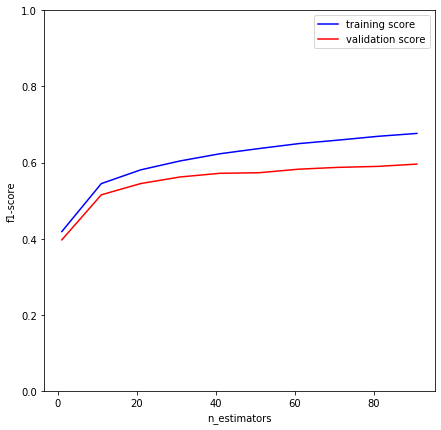

In [129]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('f1-score');